# Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("twitter_corona_PSPK.csv",usecols=["text"])

In [3]:
data.head()

,text
0,You are one of the best real hero i seen in my...
1,Our heros are our Gods...
2,Hahaha...You are indeed keenly listening to hi...
3,Donations by south celebs.\nAkshay Kumar 25cr....
4,Prabhas


In [4]:
data.shape

(5168, 1)

In [5]:
data = data.rename(columns = {'text': 'tweets'})

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stemmer= PorterStemmer()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
stemmer = WordNetLemmatizer()
Stopwords = stopwords.words('english')
def PreProcessData(data):
  final_data = data.copy()
  final_data.fillna('',inplace=True)
  final_data['tweets']=final_data.tweets.apply(lambda x:' '.join(stemmer.lemmatize(i) for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in Stopwords ))
  return final_data  
    


In [8]:
data2=PreProcessData(data)

In [9]:
data2

,tweets
0,You one best real hero seen life sir Jai Bharat
1,Our hero Gods
2,Hahaha You indeed keenly listening serious foc...
3,Donations south celebs Akshay Kumar cr Prabhas...
4,Prabhas
...,...
5163,Who tollywood hero urstrulyMahesh PawanKalyan
5164,KTRTRS Saurabhk u BJP Andhra narendramodi Pawa...
5165,Like lu
5166,I Request Everyone To Post timeline PawanKalya...


In [10]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\users\hp\anaconda3\lib\site-packages (0.15.3)


In [11]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [12]:

!pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
from textblob import TextBlob
from wordcloud import WordCloud

In [15]:
!pip install tweepy

In [16]:
import tweepy

# *Subjectivity & Polarity

In [17]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
data2["subjectivity"]= data2["tweets"].apply(getSubjectivity)

In [19]:
data2["Polarity"]=data2["tweets"].apply(getPolarity)

In [20]:
data2

,tweets,subjectivity,Polarity
0,You one best real hero seen life sir Jai Bharat,0.300000,0.600000
1,Our hero Gods,0.000000,0.000000
2,Hahaha You indeed keenly listening serious foc...,0.533333,-0.066667
3,Donations south celebs Akshay Kumar cr Prabhas...,0.000000,0.000000
4,Prabhas,0.000000,0.000000
...,...,...,...
5163,Who tollywood hero urstrulyMahesh PawanKalyan,0.000000,0.000000
5164,KTRTRS Saurabhk u BJP Andhra narendramodi Pawa...,0.000000,0.000000
5165,Like lu,0.000000,0.000000
5166,I Request Everyone To Post timeline PawanKalya...,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
!pip install WordCloud

In [43]:
from PIL import Image
from wordcloud import WordCloud

# Word Cloud

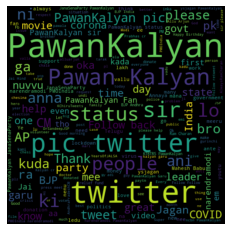

In [44]:
allWords=' '.join([twts for twts in data2["tweets"]])
WordCloud=WordCloud(width=500,height=500,random_state=123,max_font_size=110).generate(allWords)
plt.imshow(WordCloud,interpolation="bilinear")
#plt.figure(figsize=(18,10))
plt.axis("off")
plt.show()

# analyzing the data

In [45]:
def getAnalysis(score):
    if score<0:
        return "negative"
    elif score==0:
        return "neutral"
    else:
        return "positive"
    

In [46]:
data2["Analysis"]=data2["Polarity"].apply(getAnalysis)

In [47]:
data2

,tweets,subjectivity,Polarity,Analysis
0,You one best real hero seen life sir Jai Bharat,0.300000,0.600000,positive
1,Our hero Gods,0.000000,0.000000,neutral
2,Hahaha You indeed keenly listening serious foc...,0.533333,-0.066667,negative
3,Donations south celebs Akshay Kumar cr Prabhas...,0.000000,0.000000,neutral
4,Prabhas,0.000000,0.000000,neutral
...,...,...,...,...
5163,Who tollywood hero urstrulyMahesh PawanKalyan,0.000000,0.000000,neutral
5164,KTRTRS Saurabhk u BJP Andhra narendramodi Pawa...,0.000000,0.000000,neutral
5165,Like lu,0.000000,0.000000,neutral
5166,I Request Everyone To Post timeline PawanKalya...,0.000000,0.000000,neutral


# Positive tweets

In [48]:
j=1
sorted_df=data2.sort_values(by=["Polarity"])
for i in range(0,sorted_df.shape[0]):
    if(sorted_df["Analysis"][i]=="positive"):
        print(str(j)+')' +sorted_df["tweets"][i])
        print()
        j=j+1


1)You one best real hero seen life sir Jai Bharat

2)Is true VSReddy MP ysjagan YSRCParty JaiTDP JanaSenaParty BJP Andhra Looks like RSS BJP Reddy Swayamsevak Sangh RSSorg GVLNRAO rammadhavbjp JPNadda PawanKalyan AmitShah KTRTRS PiyushGoyal smritiirani sardesairajdeep kishanreddybjp nsitharaman

3)PawanKalyan iam doctor specialist working guntur I know going guntur ground level I fan movie follower principle real life Any help info want I help

4)PawanKalyan katuri choosen first place even government hospital bed vacant What secret want hide MLA may COVID POSITIVE HIV POSITIVE Now people hiding two

5)PawanKalyan dor one rule yrccp congress one rule All place GOV hospital choosen first treatment covid patient collector include private hospital also sepending situation In guntur positive case present Why katuri choosen

6)PawanKalyan dear pk sir iam staying guntur know guntur MLA situation Already sister positive He undergoing treatment Katuri medical college hospital

7)PawanKalyan He 

912)Avuna nuvvu vagedhi chaala bagundhi le Enjoy Eppudu edudhama ani untar Jagratha anti CAA protest ani bayata vasthe malli virus vastadhi make care

913)PawanKalyan edaina oka statement ivvu anna repu govt edaina help cheyaali ee time lo kondariki ani ibbadhi padataaru supply free ga ivvali anelaaga

914)Wishing Happy Ugadi

915)CM avuthadu anukunna Huh Atleast mla aina avuthadu anukunna Huh Last ki translator Ayyadurai Anyway good move StayHomeIndia savehomeindia PawanKalyan narendramodi PMOIndia BJP India JanaSenaPartyhttps twitter com PawanKalyan status

916)Happy Ugadi

917)PawanKalyan I work main newspaper capital Brazil I would like talk

918)Happy Ugadi To One All Stay Home Stay Safe Save Nation PawanKalyan pic twitter com Yu uzxvRNv

919)With social responsibility Jai jenasena

920)Ok Anna Jai janasena

921)Huge Public gathering vegetable Vijayawada city AP Ila ayithe mana AP ni kapadukovadam chala kastam Govt take serious Please respond CoronaLockdown coronavirus AndhraPrade

# negative tweets

In [49]:
j=1
sorted_df=data2.sort_values(by=["Polarity"],ascending=False)
for i in range(0,sorted_df.shape[0]):
    if(sorted_df["Analysis"][i]=="negative"):
        print(str(j)+')' +sorted_df["tweets"][i])
        print()
        j=j+1

1)Hahaha You indeed keenly listening serious focused

2)What Delhi Police How migrant manage reach border Country WTF Home Minister When Police allow people street WITH THEIR BAGS Police must stopped locality

3)Hahaha You indeed keenly listening serious focused

4)What Delhi Police How migrant manage reach border Country WTF Home Minister When Police allow people street WITH THEIR BAGS Police must stopped locality

5)PawanKalyan At least gov buy new ventilator donated money I staying guntur guntur yrccp mla suspected covid

6)Even fan pawan kalyan Every body appreciate least pk sir limit What Help one rupee If know value people In epidemic every one work http twitter com jaGUN status

7)My hmble rqst State govt Plz open Closed Uni hostel Govt Lodges atlst shltr crwd rd till Pandemic OVR We cannt loose th War agnst Covid plz plzz PMOIndia akshaykumar GautamGambhir anandmahindra PawanKalyan ajaydevgn sachin rt

8)PawanKalyan Sir please help put message across This going help lot people 

# Neutral tweets

In [50]:
j=1
sorted_df=data2.sort_values(by=["Polarity"])
for i in range(0,sorted_df.shape[0]):
    if(sorted_df["Analysis"][i]=="neutral"):
        print(str(j)+')' +sorted_df["tweets"][i])
        print()
        j=j+1

1)Our hero Gods

2)Donations south celebs Akshay Kumar cr Prabhas cr Pawan Kalyan cr Mahesh Babu cr Allu Arjun cr Chiranjeevi cr Junior NTR lac Ram Charan lac But donation Khans earns crore u Covid

3)Prabhas

4)Donations By actor Akki Crore prabhash Crore Pawan kalyan crore Mahesh Babu crore Chiranjivi crore Ram Charan lakh Varun dhawan lakh Kapil Sharma lakh Nithin lakh

5)Inspired Pawan Kalyan Telugu Star Ram Charan Donate lakh COVID Aid http sankhov com inspired pawan kalyan telugu star ram charan donate lakh covid aid pic twitter com CVfbFYwyjn

6)Bec time donot proposed fund

7)Pawan Kalyan Garu evarinanna pakkana pettaru ante reason eyana alanti vadu Ani mundhe thelisi untundi simple ga pakkana r

8)PawanKalyan

9)PawanKalyan But donot know depth situation If mobi health ministry conduct local election make AP highest number covid case make AP notorious covid

10)PawanKalyan Jagan jagan CM thing done epidemic

11)PawanKalyan And brough relative KMC If atleast person try help lim

1087)ysjagan PawanKalyan http twitter com chandrasanaka status

1088)lo

1089)MP

1090)Babu baddam garu evaru gurtinchina lekapoina pakkavadu chesina cheyakapoina edi asinchakunda chesede sayam adi pk ki baga telsu way life brother evado vachi edo chestadani kadu ayaana help chestundi

1091)Grateful

1092)pic twitter com hr jkDrFn

1093)Thama vaipalyam bayatapadakoodadu Credit inkokadiki raakoodadu anede sakshi natudu ysjagan tapana

1094)

1095)Annaya yeppudoo cheppadu malla yenduku ra Ambati ambothu ga

1096)PAYTM PMCARES

1097)meeru solve chesinattu pk ki enduku reply istunaaaru andaru logic ela miss ayyav

1098)Gujarat gurinchi Eppudu vesaru ninne ga help monne jarigindhi Ela jarigindhipic twitter com D JOsLFw

1099)This enough click follow

1100)

1101)Jagan Reddy wasting money advertising party add America JanaSenaParty PawanKalyan BJP India PMOIndia AmitShah Sunil Deodhar klnbjppic twitter com Y H VQGYkV

1102)

1103)powder VP

1104)ysjagan

1105)Ysrcp party leader aa anukunna k

2087)Fb

2088)Unity strength Follow back Every Janasenani min k follower Time improve follower count PawanKalyan Fan Retweet Comment Your Id Follow retweets tweet Follow Follow back VakeelSaab FollowUfollowmepic twitter com VPSXlJVWc

2089)sivakumar om PawanKalyan pic twitter com HAe NULYjT

2090)Jan bro enter aindhi

2091)PawanKalyan http www facebook com VoiceofSouthIndia video vh e

2092)HBDRoyalRAMCHARAN AlwaysRamCharan PawanKalyan KChiruTweets upasanakonidelapic twitter com JIOEx SMS

2093)TELUGU state

2094)Prabhas donated cr nation lac state

2095)We always greatfull

2096)Anna meeru entha donate chesaru follower

2097)wishyouhappybirthday HBDRamCharanFromPSPKFans AlwaysRamCharan PawanKalyan KChiruTweetspic twitter com H Gu HD AX

2098)Annaya sir annaya antepic twitter com enDCkMwAOS

2099)http twitter com Bharrathh status ysjagan He remorse You suspend would harass people Please dismiss upheld law order

2100)

2101)PawanKalyan AlwaysRamCharan HBDRoyalRAMCHARANpic twitter com I


3087)Mr Kovid

3088)Parledhu brooo

3089)Prasanna PSPK

3090)Meeru jagan family gurinchi matladochu Mem mee pavala PawanKalyan gadi pellalu gurinchi matlada koodadhu Eam thintunnav ra kadupu ki kojja jaggu

3091)Oh sry bro

3092)It health minister People wondering Do health minister AP Who health minister AP

3093)Did forget made comment narendramodi ji Modiji told war start electronic

3094)SriRamKosuru

3095)FollowUFollowMe rcpdutta

3096)MCA well made movie U bank upon

3097)done

3098)Vis

3099)

3100)

3101)FollowuFollowMe

3102)PawanKalyan pic twitter com FWKCuOmku

3103)Konchem sontha brain use chey babai Script lo edhi unte adhi chadive matlade habit marchuko

3104)TakkuvaFollowersSangam Every Pawankalyan fan min follower Time improve follower count Dear PawanKalyan Fans Retweet Comment Ur Id Follow retweets tweet Follow Follow back PSPK VakeelSaab FollowUFollowMe

3105)

3106)Vis

3107)Please help save sir pic twitter com ZoC NAYyyA

3108)Pawan kalyan garu requesting every ci

# POLARITY vs SUBJECTIVITY

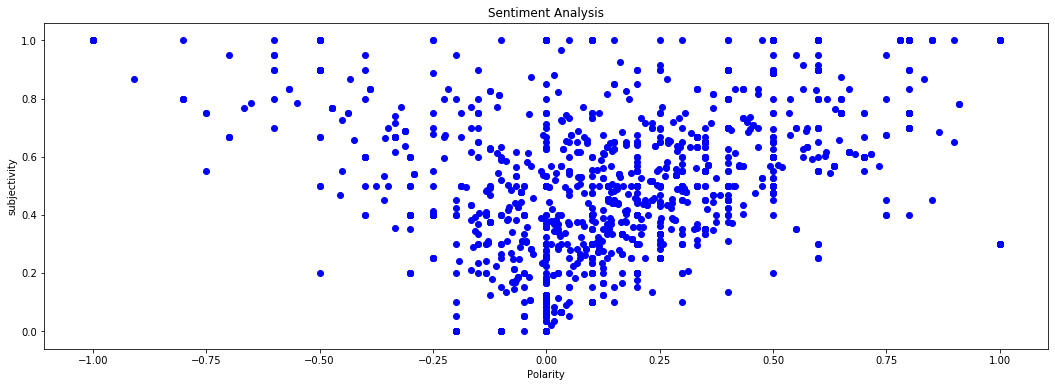

In [53]:
plt.figure(figsize=(18,6))
for i in range(0,data2.shape[0]):
    plt.scatter(data2["Polarity"][i],data2["subjectivity"][i],color="blue")
    plt.title("Sentiment Analysis")
    plt.xlabel("Polarity")
    plt.ylabel("subjectivity")

# % positive tweets

In [58]:
ptweets=data2[data2.Analysis=="positive"]
ptweets=ptweets["tweets"]

round((ptweets.shape[0] / data2.shape[0] *100),1)

24.4

# % of negative tweets

In [59]:
ntweets=data2[data2.Analysis=="negative"]
ntweets=ntweets["tweets"]

round((ntweets.shape[0] / data2.shape[0] *100),1)

7.2

# plot

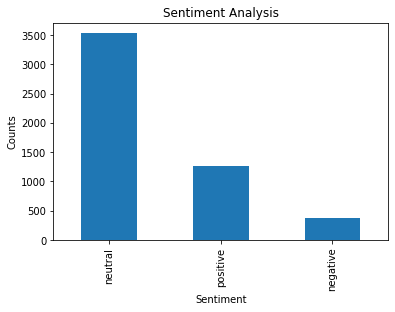

In [62]:
data2["Analysis"].value_counts().plot(kind="bar")
#plt.figure(figsize=(18,10))
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()